In [ ]:
import numpy as np
r=1
c=1
patch_11 = np.array(([8*r*56+8*c, 8*r*56+8*c+1, 8*r*56+8*c+2,8*r*56+8*c+3,8*r*56+8*c+4,8*r*56+8*c+5,8*r*56+8*c+6, 8*r*56+8*c+7,
(8*r+1)*56+8*c, (8*r+1)*56+8*c+1, (8*r+1)*56+8*c+2,(8*r+1)*56+8*c+3,(8*r+1)*56+8*c+4,
(8*r+1)*56+8*c+5, (8*r+1)*56+8*c+6, (8*r+1)*56+8*c+7,
(8*r+2)*56+8*c, (8*r+2)*56+8*c+1, (8*r+2)*56+8*c+2,(8*r+2)*56+8*c+3,(8*r+2)*56+8*c+4,
(8*r+2)*56+8*c+5, (8*r+2)*56+8*c+6, (8*r+2)*56+8*c+7,
(8*r+3)*56+8*c, (8*r+3)*56+8*c+1, (8*r+3)*56+8*c+2,(8*r+3)*56+8*c+3,(8*r+3)*56+8*c+4,
(8*r+3)*56+8*c+5, (8*r+3)*56+8*c+6, (8*r+3)*56+8*c+7,
(8*r+4)*56+8*c, (8*r+4)*56+8*c+1, (8*r+4)*56+8*c+2,(8*r+4)*56+8*c+3,(8*r+4)*56+8*c+4,
(8*r+4)*56+8*c+5, (8*r+4)*56+8*c+6, (8*r+4)*56+8*c+7,
(8*r+5)*56+8*c, (8*r+5)*56+8*c+1, (8*r+5)*56+8*c+2,(8*r+5)*56+8*c+3,(8*r+5)*56+8*c+4,
(8*r+5)*56+8*c+5, (8*r+5)*56+8*c+6, (8*r+5)*56+8*c+7,
(8*r+6)*56+8*c, (8*r+6)*56+8*c+1, (8*r+6)*56+8*c+2,(8*r+6)*56+8*c+3,(8*r+6)*56+8*c+4,
(8*r+6)*56+8*c+5, (8*r+6)*56+8*c+6, (8*r+6)*56+8*c+7,
(8*r+7)*56+8*c, (8*r+7)*56+8*c+1, (8*r+7)*56+8*c+2,(8*r+7)*56+8*c+3,(8*r+7)*56+8*c+4,
(8*r+7)*56+8*c+5, (8*r+7)*56+8*c+6, (8*r+7)*56+8*c+7]))

In [2]:
import timm
import torch

model = timm.create_model('vit_base_patch16_224', pretrained=False)

# Calculate the total number of parameters
num_parameters = sum(p.numel() for p in model.parameters())

# Convert the number of parameters to millions
num_parameters_in_millions = num_parameters / 1e6

# Print the number of parameters in millions
print('Number of parameters: {:.2f}M'.format(num_parameters_in_millions))

Number of parameters: 86.57M


In [ ]:
patch_11

In [ ]:
patch_11.reshape(8,8)

In [ ]:
import numpy as np
a = np.array(([1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]))
print(a.shape)
print(a)
b = a.reshape(-1)
print(b.shape,b)

IndexError: index 4 is out of bounds for axis 1 with size 4

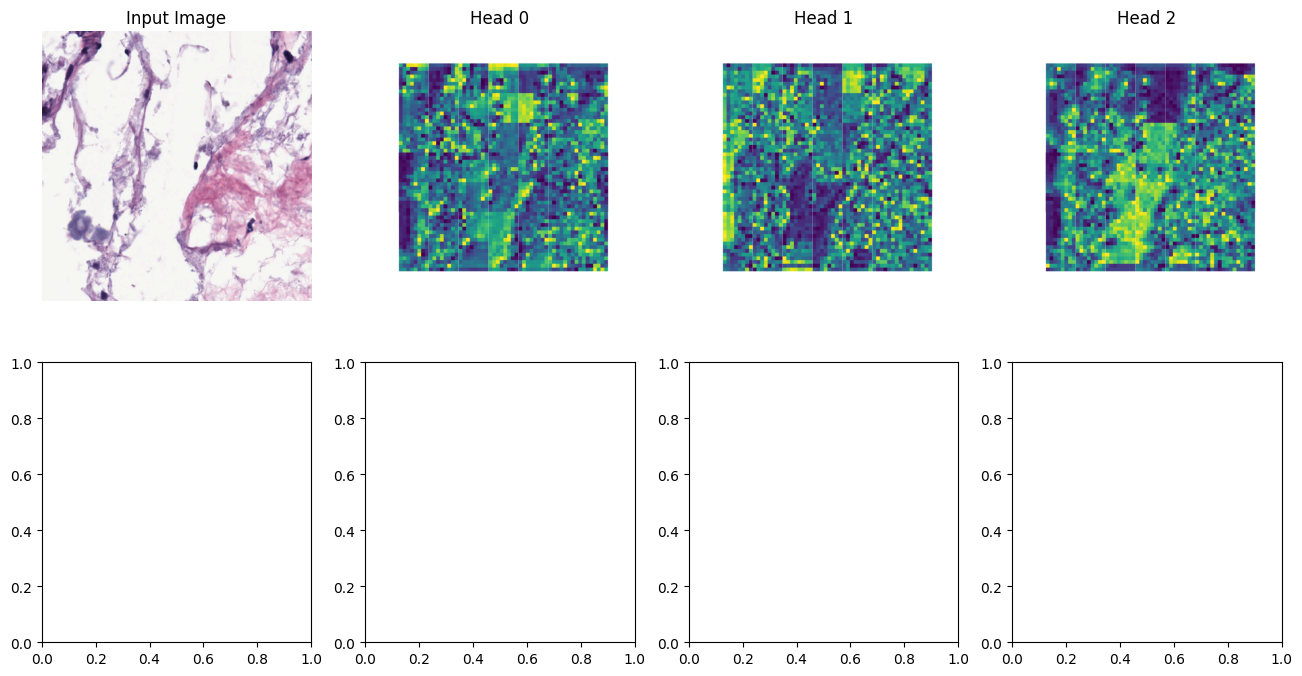

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the input image
import os
parent_dir = os.path.dirname(os.getcwd())
target_dir = os.path.join(parent_dir, 'TCGA_copy_for_Visulization')
input_image = os.path.join(target_dir,\
    '20230207_IMG0388_TCGA-3Z-A93Z-01A-01-TSA.3B7A8AD8-E35C-420E-A819-097F34A52F54_polygon_8_Gleason-3+3_1.png')
output_dir = os.path.join(os.curdir,'visualization')

img_PIL = Image.open(input_image).convert('RGB')
input_img = np.array(img_PIL)  # Convert to an array to plot with matplotlib

# Assuming attentions_s2 and other data are loaded correctly
# Your attention images are saved as 'Attention_Head{i}_scale2_Patches.png'

# Create a larger plot to accommodate 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust size as needed

# Display the input image in the first subplot
axes[0, 0].imshow(input_img)
axes[0, 0].axis('off')
axes[0, 0].set_title('Input Image')

# Load and display each attention head image
for i in range(8):
    row = i // 4
    col = i % 4 + 1 if row == 0 else i % 4  # Adjust column index for the first row
    img_path = f'Attention_Head{i}_scale3_Patches_final_block.png'
    attn_img = Image.open(img_path)
    axes[row, col].imshow(attn_img)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Head {i}')

# Adjust layout
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust spacing to preference

# Save and show the final grid
plt.savefig('Combined_2x4_Grid.png')
plt.show()

In [ ]:
from PIL import Image

# Define the filenames of the 8 images
filenames = [
    'Attention_Head0_scale3_Patches_final_block.png',
    'Attention_Head1_scale3_Patches_final_block.png',
    'Attention_Head2_scale3_Patches_final_block.png',
    'Attention_Head3_scale3_Patches_final_block.png',
    'Attention_Head4_scale3_Patches_final_block.png',
    'Attention_Head5_scale3_Patches_final_block.png',
    'Attention_Head6_scale3_Patches_final_block.png',
    'Attention_Head7_scale3_Patches_final_block.png'
]

# Load all images into a list
images = [Image.open(filename) for filename in filenames]

# Assume all images are the same size
width, height = images[0].size

# Create a new image with width * number of images horizontally
total_width = width * 8
total_height = height

# Create a new blank image with the correct size
new_image = Image.new('RGB', (total_width, total_height))

# Paste each image into the new image
x_offset = 0
for img in images:
    new_image.paste(img, (x_offset, 0))
    x_offset += width  # move to the next position horizontally

# Save the combined image
new_image.save('Combined_Attention_Heads.png')
new_image.show()

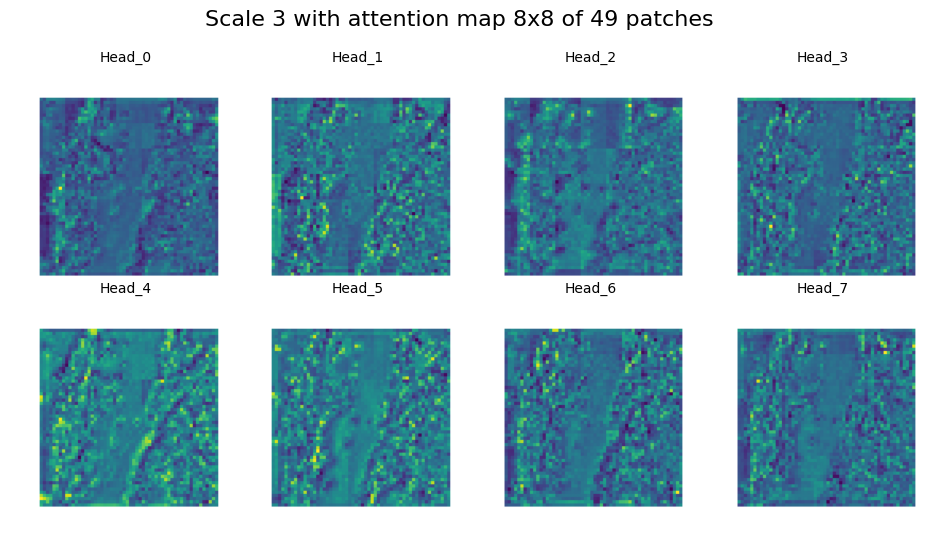

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the filenames of the 8 images
filenames = [
    'Attention_Head0_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head1_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head2_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head3_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head4_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head5_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head6_scale2_Patches_final_block_new_before_softmax.png',
    'Attention_Head7_scale2_Patches_final_block_new_before_softmax.png'
]

# Load all images into a list
images = [Image.open(filename) for filename in filenames]

# Set up the figure and axes for a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each image in its respective subplot
for i, (img, ax) in enumerate(zip(images, axes)):
    ax.imshow(img)
    ax.set_title(f'Head_{i}', fontsize=10)  # Set a smaller font size for the title
    ax.axis('off')  # Turn off axis lines and labels

# Add main title
plt.suptitle('Scale 3 with attention map 8x8 of 49 patches', fontsize=16)

# Adjust layout to prevent overlap and minimize space
# fig.tight_layout()
fig.subplots_adjust(hspace=0.0, wspace=0.0)  # Adjust margins and spacing

# Show the plot
plt.show()


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for head_index in range(8):
    # Select the specific head data
    head_data = attentions_s3[:,head_index,:]
    
    # Initialize a blank image for this head
    final_image = np.zeros((224, 224))  # 7x7 patches, each patch 8x8 pixels

    # Populate the big grid with patches for this head
    for i in range(49):
        row = i // 7
        col = i % 7
        patch = head_data[i,:].reshape(8,8)
        patch = nn.functional.interpolate(patch.unsqueeze(0).unsqueeze(1), scale_factor=4, mode="nearest")[0,0,...]
        patch = patch.cpu().numpy()
        vmin, vmax = patch.min(), patch.max()
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
        normalized_patch = norm(patch)
        final_image[row*32:(row+1)*32, col*32:(col+1)*32] = normalized_patch

    # Plotting the final image for this head in the respective subplot
    ax = axes[head_index // 4, head_index % 4]
    ax.imshow(final_image, cmap='viridis')
    ax.set_title(f'Head {head_index + 1}')
    ax.axis('off')  # Turn off the axis

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('./visualization/normal/All_Attention_Heads_2x4_Grid_afterSoftmax_individual_patch_norm_interpolated.png')
plt.show()

In [1]:
import torch
attn_for_scale_beforeSoftmax = torch.randn([1,49,8,86,86])

RuntimeError: shape '[1, 1]' is invalid for input of size 8

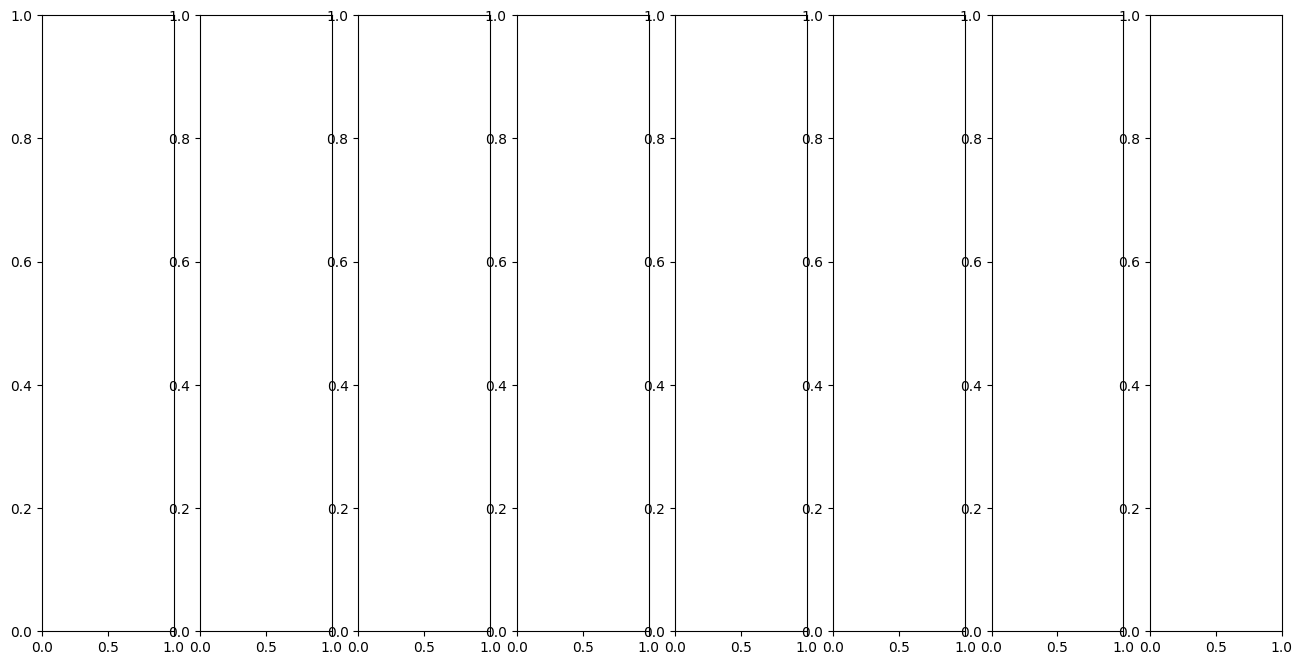

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

def generate_attention_heads(scale_data, interpolation_scale):
    """Generates a grid of attention head images for a given scale."""
    num_heads = 8
    fig, axes = plt.subplots(nrows=1, ncols=num_heads, figsize=(16, 8))
    for head_index in range(num_heads):
        head_data = scale_data[:, head_index, :]
        final_image = np.zeros((224, 224))
        for i in range(49):  # Assuming a 7x7 grid of patches
            row, col = divmod(i, 7)
            patch_data = head_data[i].reshape(int(224/7/interpolation_scale), int(224/7/interpolation_scale))
            patch = nn.functional.interpolate(patch_data.unsqueeze(0).unsqueeze(0), scale_factor=interpolation_scale, mode="nearest")[0, 0]
            final_image[row*32:(row+1)*32, col*32:(col+1)*32] = patch.numpy()
        axes[head_index].imshow(final_image, interpolation='nearest', vmin=head_data.min(), vmax=head_data.max())
        axes[head_index].set_title(f'Head {head_index + 1}')
        axes[head_index].axis('off')
    plt.tight_layout()
    plt.savefig(f'./visualization/Cancer/All_Attention_Heads_Scale_{scale_name}.png')
    plt.close(fig)  # Close to free memory
    return f'./visualization/Cancer/All_Attention_Heads_Scale_{scale_name}.png'

# Example usage for one scale:
for i in range(4):
    if i == 0:
        attentions_before_softmax = attn_for_scale_beforeSoftmax[0, :, :, 0, 1]  # Adjust indices appropriately for each scale
        softmaxed_attentions = attentions_before_softmax.unsqueeze(1)
        image_path = generate_attention_heads(softmaxed_attentions, interpolation_scale=32)  # Adjust 'interpolation_scale' based on scale
    elif i==1:
        attentions_before_softmax = attn_for_scale_beforeSoftmax[0, :, :, 0, 2:6]  # Adjust indices appropriately for each scale
        softmaxed_attentions = attentions_before_softmax.softmax(dim=-1)
        image_path = generate_attention_heads(softmaxed_attentions, interpolation_scale=16)  # Adjust 'interpolation_scale' based on scale
    elif i==2:
        attentions_before_softmax = attn_for_scale_beforeSoftmax[0, :, :, 0, 6:22]  # Adjust indices appropriately for each scale
        softmaxed_attentions = attentions_before_softmax.softmax(dim=-1)
        image_path = generate_attention_heads(softmaxed_attentions, interpolation_scale=8)  # Adjust 'interpolation_scale' based on scale
    elif i==3:
        attentions_before_softmax = attn_for_scale_beforeSoftmax[0, :, :, 0, 22:86]  # Adjust indices appropriately for each scale
        softmaxed_attentions = attentions_before_softmax.softmax(dim=-1)
        image_path = generate_attention_heads(softmaxed_attentions, interpolation_scale=4)  # Adjust 'interpolation_scale' based on scale

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 8))  # 4 scales x 8 heads each
for i, scale_name in enumerate(['S0', 'S1', 'S2', 'S3']):
    # for j in range(8):
    img = plt.imread(f'./visualization/Cancer/All_Attention_Heads_2x4_Grid_beforeSoftmax_224x224_{scale_name}.png')
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

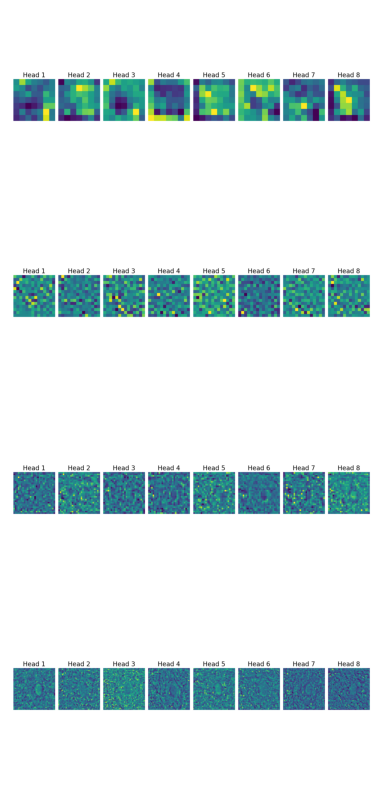

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 8))  # 4 scales x 8 heads each
for i, scale_name in enumerate(['S0', 'S1', 'S2', 'S3']):
    # for j in range(8):
    img = plt.imread(f'./visualization/Cancer/All_Attention_Heads_2x4_Grid_beforeSoftmax_224x224_{scale_name}.png')
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()

0 S0 torch.Size([49, 8, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
0 S0 torch.Size([49, 1])
1 S1 torch.Size([49, 8, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
1 S1 torch.Size([49, 4])
2 S2 torch.Size([49, 8, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
2 S2 torch.Size([49, 16])
3 S3 torch.Size([49, 8, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])
3 S3 torch.Size([49, 64])


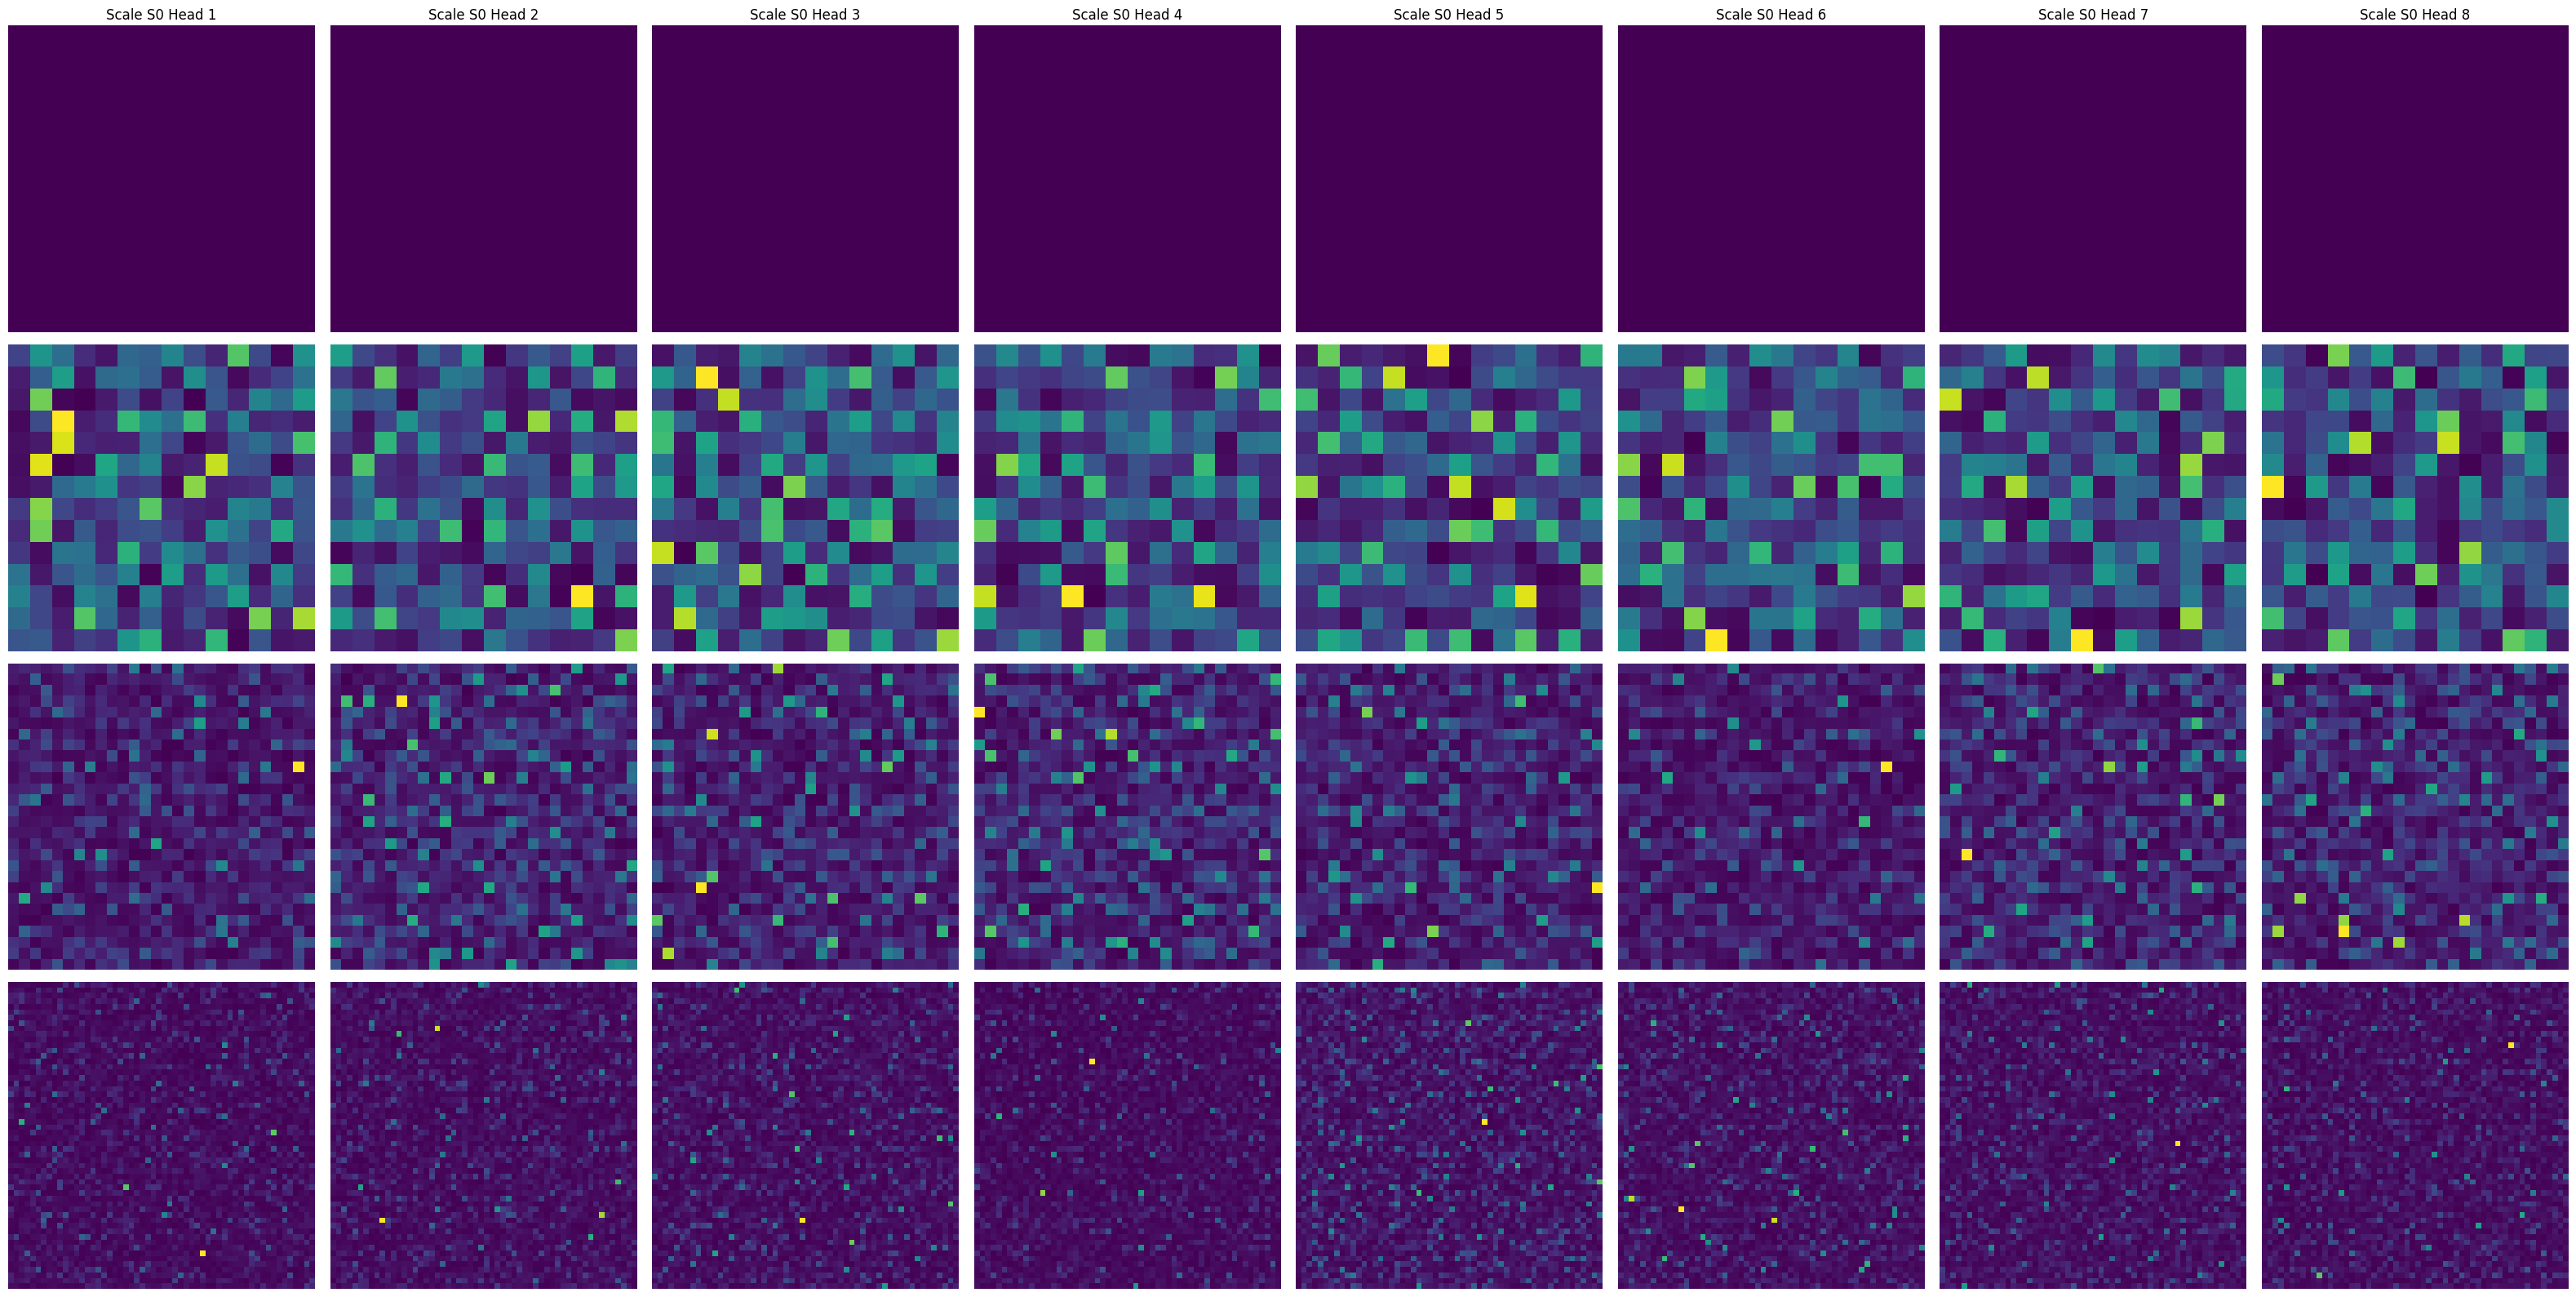

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Assuming attn_for_scale_beforeSoftmax is preloaded with your attention data
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(32, 16))  # 4 scales x 8 heads

scales = ['S0', 'S1', 'S2', 'S3']
scale_indices = {
    'S0': (0, 1),
    'S1': (2, 6),
    'S2': (6, 22),
    'S3': (22, 86)
}

for scale_idx, scale in enumerate(scales):
    start_idx, end_idx = scale_indices[scale]
    attentions_before_softmax = attn_for_scale_beforeSoftmax[0, :, :, 0, start_idx:end_idx]
    attentions_separate_softmax = attentions_before_softmax.softmax(dim=-1)
    print(scale_idx,scale,attentions_separate_softmax.shape)

    for head_index in range(8):
        head_data = attentions_separate_softmax[:, head_index, :] # 49,1/49,4/...
        print(scale_idx,scale,head_data.shape)
        final_image = np.zeros((224, 224))
        for i in range(49):  # 7x7 grid
            row, col = divmod(i, 7)
            # Determine patch size based on the scale
            patch_size = 224 // 7 // (2 ** (5 - scale_idx))  # Adjust interpolation factor per scale
            patch_data = head_data[i].reshape(patch_size, patch_size)
            patch = F.interpolate(patch_data.unsqueeze(0).unsqueeze(0), scale_factor=(2 ** (5 - scale_idx)), mode="nearest")[0, 0]
            final_image[row*32:(row+1)*32, col*32:(col+1)*32] = patch.cpu().numpy()

        ax = axes[scale_idx, head_index]
        ax.imshow(final_image, interpolation='nearest', vmin=head_data.min(), vmax=head_data.max())
        ax.set_title(f'Scale {scale} Head {head_index + 1}' if scale_idx == 0 else '')
        ax.axis('off')
plt.subplots_adjust(left=0.01, right=0.99, top=0.95, bottom=0.05, wspace=0.05, hspace=0.05)
plt.tight_layout()
plt.show()
